In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv("Algerian_forest_fires_Cleaned.csv")

data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


<AxesSubplot:>

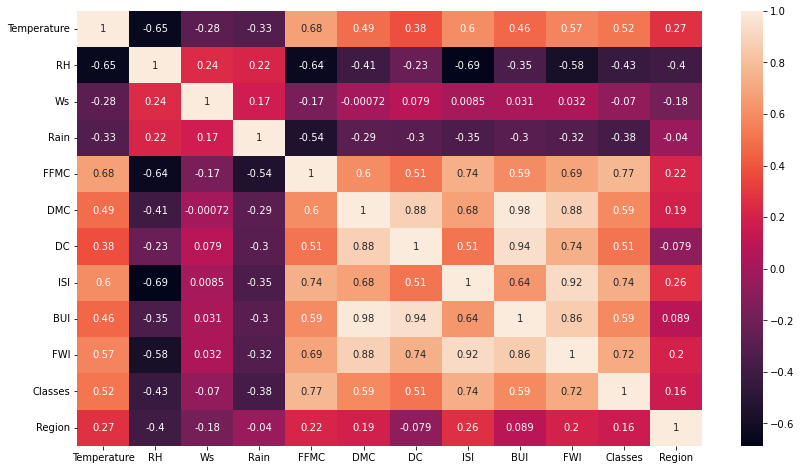

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot= True)

## Divide the data into independant and dependant features

In [19]:
X = data.drop("FWI", axis = 1)   # independant features / input (multiple)
Y = data["FWI"]                  # dependant features / output

## divide the data into two parts train and test

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((182, 11), (61, 11), (182,), (61,))

## 

## Feature Selection Function 
- function takes two values first is dataset and second is threshold %
- then we create a object with set() to not have repeated values
- then we create a object storing correlation values
- then we use range function that goes one by one to columns of dataset
- then we again use range funciton that goes one by one rows of dataset to
- now the absolute value from row and column greater than threshold 
- store these columns into object
- and add this object into my emtpy set() object
- and at last show this empty set() object which is now storing columns that are highly correlated

In [17]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                column_name = corr_matrix.columns[i]
                col_corr.add(column_name)
    return col_corr    

In [25]:
Correlated_features = correlation(X_train,0.85)

Correlated_features

{'BUI', 'DC'}

- BUI and DC are highly correlated independant features need to remove them before making Model

In [26]:
X_train.drop(Correlated_features, axis =1, inplace = True)

X_test.drop(Correlated_features, axis =1, inplace = True)

## Now Standardize my Input/Independant feature X_train, X_test data

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.fit_transform(X_test)

#### Ploting X_scaled_train and X_train before and after standardization

Text(0.5, 1.0, 'X_train after scaling')

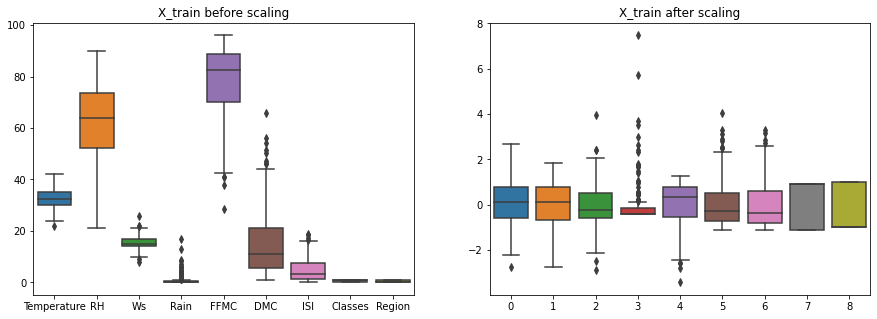

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_scaled_train)
plt.title("X_train after scaling")

## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

regressor = LinearRegression()
regressor.fit(X_scaled_train, Y_train)

Y_test_predict = regressor.predict(X_scaled_test)

# check error using MAE
mae = mean_absolute_error(Y_test,Y_test_predict)

# check accuracy using R sqaure
score = r2_score(Y_test,Y_test_predict)

print("Mean Absolute error :", mae)
print("Accuracy using R Square :", score)

Mean Absolute error : 0.9939450225331398
Accuracy using R Square : 0.9607056657860651


## Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_scaled_train, Y_train)

Y_test_predict = lasso.predict(X_scaled_test)

mae = mean_absolute_error(Y_test,Y_test_predict)

# check accuracy using R sqaure
score = r2_score(Y_test,Y_test_predict)

print("Mean Absolute error :", mae)
print("Accuracy using R Square :", score)

Mean Absolute error : 0.9605020166901075
Accuracy using R Square : 0.9692970913627958


## Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_scaled_train, Y_train)

Y_test_predict = ridge.predict(X_scaled_test)

mae = mean_absolute_error(Y_test,Y_test_predict)

# check accuracy using R sqaure
score = r2_score(Y_test,Y_test_predict)

print("Mean Absolute error :", mae)
print("Accuracy using R Square :", score)

Mean Absolute error : 0.9862070802884392
Accuracy using R Square : 0.9616458508455314


## Elastic Net Regression

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

elastic = ElasticNet()
elastic.fit(X_scaled_train, Y_train)

Y_test_predict = elastic.predict(X_scaled_test)

mae = mean_absolute_error(Y_test,Y_test_predict)

# check accuracy using R sqaure
score = r2_score(Y_test,Y_test_predict)

print("Mean Absolute error :", mae)
print("Accuracy using R Square :", score)

Mean Absolute error : 1.6511868133560939
Accuracy using R Square : 0.9081701979826986


## Pickling these Regression

In [40]:
import pickle

pickle.dump(ridge,(open("ridge.pkl","wb")))
pickle.dump(lasso,(open("lasso.pkl","wb")))
pickle.dump(elastic,(open("elastic.pkl","wb")))